In [1]:
import pandas as pd
df = pd.read_csv('D:/data/GoodsOrder.csv',encoding='GBK')
df

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡
...,...,...
43362,9835,鸡
43363,9835,其他蔬菜
43364,9835,购物袋
43365,9835,热带水果


<IPython.core.display.Javascript object>


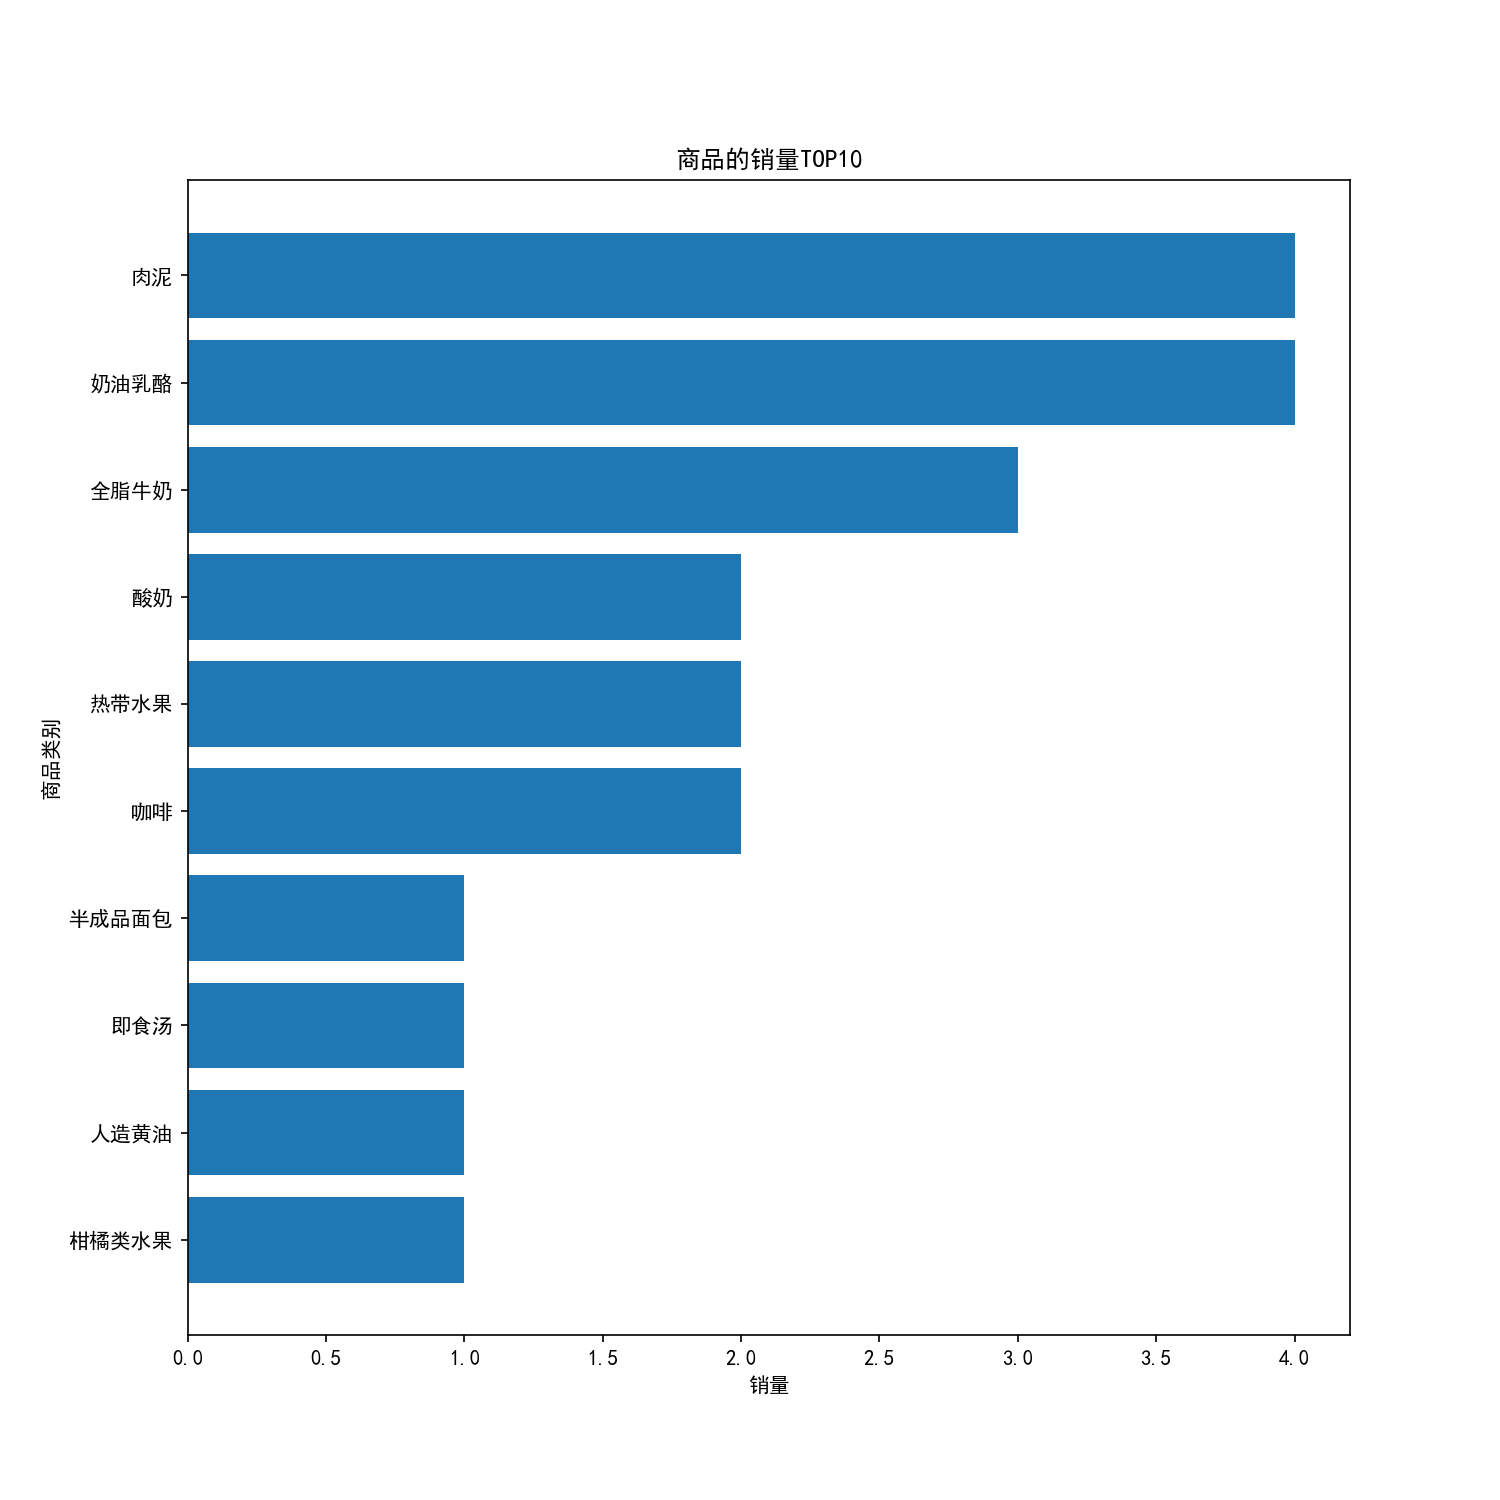

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
x=df[:10]['Goods']
y=df[:10]['id']
plt.figure(figsize = (10, 10))  
plt.barh(x,y)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.xlabel('销量')  
plt.ylabel('商品类别')  
plt.title('商品的销量TOP10') 
plt.show() 

In [3]:
order=df.groupby(['Goods']).count()
order1=order.sort_values('id',ascending=False)
order1[:10]

,id
Goods,
全脂牛奶,2513
其他蔬菜,1903
面包卷,1809
苏打,1715
酸奶,1372
瓶装水,1087
根茎类蔬菜,1072
热带水果,1032
购物袋,969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43367 entries, 0 to 43366
Data columns (total 2 columns):
id       43367 non-null int64
Goods    43367 non-null object
dtypes: int64(1), object(1)
memory usage: 677.7+ KB


In [6]:
df = pd.read_csv('D:/data/GoodsOrder.csv',encoding='GBK')
df['Goods']=df['Goods'].apply(lambda x:','+x)
df=df.groupby('id').sum()
print(type(df['Goods']))
df['Goods']=df['Goods'].apply(lambda x:[x[1:]])
df_list=list(df['Goods'])
df_split=[]
for i in df_list:
    p=i[0].split(',')
    df_split.append(p)

<class 'pandas.core.series.Series'>


In [7]:
def createC1(dataset):
    C1=[]
    for tranction in dataset:
        for item in tranction:
            if not [item] in C1: 
                C1.append([item])
    C1.sort()
    return list(map(frozenset,C1))

In [11]:
def getK_(data,Ck,minsupport):
    record={}
    for item in data:
        for j in Ck:
            if j.issubset(item):
                if not j in record:
                    record[j]=1
                else:
                    record[j]+=1
    lenitem=len(data)
    relist=[]
    supportdata={}
    for key in record:
        support=record[key]/lenitem
        if support>minsupport:
            relist.append(key)
            supportdata[key]=support
    return relist,supportdata

In [9]:
def aprioriGen(Lk, k):
    reList = [] 
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):
            L1 = list(Lk[i])[:k - 2]
            L2 = list(Lk[j])[:k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:
                a = Lk[i] | Lk[j] 
                a1 = list(a)  
                b = []  
                for q in range(len(a1)):
                    t = [a1[q]]
                    tt = frozenset(set(a1) - set(t))
                    b.append(tt)
                t = 0
                for w in b:
                    if w in Lk:
                        t += 1
                if len(b) == t:
                    reList.append(b[0] | b[1])

    return reList

In [19]:
def apriori(dataSet, minSupport=0.2):
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))
    L1, supportData = getK_(D, C1, minSupport)
    L = [L1]  
    k = 2
    while len(L[k - 2]) > 0:
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = getK_(D, Ck, minSupport)
        supportData.update(supK)
        L.append(Lk) 
        k += 1
    del L[-1]
    return L, supportData

In [20]:
def getSubset(fromList, totalList):
    for i in range(len(fromList)):
        t = [fromList[i]]
        tt = frozenset(set(fromList) - set(t)) 

        if tt not in totalList:
            totalList.append(tt)
            tt = list(tt)
            if len(tt) > 1:
                getSubset(tt, totalList)

In [21]:
def calcConf(freqSet, H, supportData, ruleList, minConf):
    for conseq in H:
        conf = supportData[freqSet] / supportData[freqSet - conseq] 
        lift = supportData[freqSet] / (supportData[conseq] * supportData[freqSet - conseq])
        if conf >= minConf and lift > 1:
            print(freqSet - conseq, '-->', conseq, '支持度', round(supportData[freqSet], 6), '置信度：', round(conf, 6),
                  'lift值为：', round(lift, 6))
            ruleList.append((freqSet - conseq, conseq, conf))

In [22]:
def get_rule(L, supportData, minConf=0.7):
    bigRuleList = []  
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = list(freqSet)
            all_subset = []  
            getSubset(H1, all_subset)
            calcConf(freqSet, all_subset, supportData, bigRuleList, minConf)
    return bigRuleList

In [23]:
if __name__ == '__main__':
    dataSet = df_split
    
    L, supportData = apriori(dataSet, minSupport=0.02)

    rule = get_rule(L, supportData, minConf=0.35)


frozenset({'其他蔬菜'}) --> frozenset({'全脂牛奶'}) 支持度 0.074835 置信度： 0.386758 lift值为： 1.513634
frozenset({'酸奶'}) --> frozenset({'全脂牛奶'}) 支持度 0.056024 置信度： 0.401603 lift值为： 1.571735
frozenset({'黄油'}) --> frozenset({'全脂牛奶'}) 支持度 0.027555 置信度： 0.497248 lift值为： 1.946053
frozenset({'柑橘类水果'}) --> frozenset({'全脂牛奶'}) 支持度 0.030503 置信度： 0.36855 lift值为： 1.442377
frozenset({'热带水果'}) --> frozenset({'全脂牛奶'}) 支持度 0.042298 置信度： 0.403101 lift值为： 1.577595
frozenset({'凝乳'}) --> frozenset({'全脂牛奶'}) 支持度 0.026131 置信度： 0.490458 lift值为： 1.919481
frozenset({'根茎类蔬菜'}) --> frozenset({'其他蔬菜'}) 支持度 0.047382 置信度： 0.434701 lift值为： 2.246605
frozenset({'根茎类蔬菜'}) --> frozenset({'全脂牛奶'}) 支持度 0.048907 置信度： 0.448694 lift值为： 1.756031
frozenset({'猪肉'}) --> frozenset({'全脂牛奶'}) 支持度 0.022166 置信度： 0.38448 lift值为： 1.504719
frozenset({'酸奶油'}) --> frozenset({'全脂牛奶'}) 支持度 0.032232 置信度： 0.449645 lift值为： 1.759754
frozenset({'猪肉'}) --> frozenset({'其他蔬菜'}) 支持度 0.021657 置信度： 0.375661 lift值为： 1.941476
frozenset({'酸奶油'}) --> frozenset({'其他蔬菜'})

In [24]:
L

[[frozenset({'人造黄油'}),
  frozenset({'柑橘类水果'}),
  frozenset({'咖啡'}),
  frozenset({'热带水果'}),
  frozenset({'酸奶'}),
  frozenset({'全脂牛奶'}),
  frozenset({'仁果类水果'}),
  frozenset({'奶油乳酪'}),
  frozenset({'其他蔬菜'}),
  frozenset({'长面包'}),
  frozenset({'黄油'}),
  frozenset({'面包卷'}),
  frozenset({'瓶装啤酒'}),
  frozenset({'超高温杀菌的牛奶'}),
  frozenset({'巧克力'}),
  frozenset({'瓶装水'}),
  frozenset({'白面包'}),
  frozenset({'凝乳'}),
  frozenset({'牛肉'}),
  frozenset({'冷冻热狗肠'}),
  frozenset({'苏打'}),
  frozenset({'鸡'}),
  frozenset({'报纸'}),
  frozenset({'水果/蔬菜汁'}),
  frozenset({'糖'}),
  frozenset({'特制门锁'}),
  frozenset({'糕点'}),
  frozenset({'酪'}),
  frozenset({'咸点心'}),
  frozenset({'威化饼'}),
  frozenset({'根茎类蔬菜'}),
  frozenset({'糖果'}),
  frozenset({'罐装啤酒'}),
  frozenset({'香肠'}),
  frozenset({'购物袋'}),
  frozenset({'黑面包'}),
  frozenset({'一般饮料'}),
  frozenset({'卫生用品'}),
  frozenset({'汉堡肉'}),
  frozenset({'餐巾'}),
  frozenset({'猪肉'}),
  frozenset({'莓果'}),
  frozenset({'酸奶油'}),
  frozenset({'葡萄'}),
  frozenset({'甜点'}),
  fro

In [25]:
supportData

{frozenset({'人造黄油'}): 0.05856634468734113,
 frozenset({'柑橘类水果'}): 0.08276563294356888,
 frozenset({'咖啡'}): 0.05805795627859685,
 frozenset({'热带水果'}): 0.10493136756481952,
 frozenset({'酸奶'}): 0.13950177935943062,
 frozenset({'全脂牛奶'}): 0.25551601423487547,
 frozenset({'仁果类水果'}): 0.07564819522114896,
 frozenset({'奶油乳酪'}): 0.03965429588205389,
 frozenset({'其他蔬菜'}): 0.1934926283680732,
 frozenset({'长面包'}): 0.037417386883579054,
 frozenset({'黄油'}): 0.05541433655312659,
 frozenset({'面包卷'}): 0.18393492628368074,
 frozenset({'瓶装啤酒'}): 0.08052872394509406,
 frozenset({'超高温杀菌的牛奶'}): 0.03345195729537367,
 frozenset({'巧克力'}): 0.04961870869344179,
 frozenset({'瓶装水'}): 0.11052364006100661,
 frozenset({'白面包'}): 0.042094560244026434,
 frozenset({'凝乳'}): 0.05327910523640061,
 frozenset({'牛肉'}): 0.05246568378240976,
 frozenset({'冷冻热狗肠'}): 0.058973055414336555,
 frozenset({'苏打'}): 0.17437722419928825,
 frozenset({'鸡'}): 0.04290798169801729,
 frozenset({'报纸'}): 0.07981698017285206,
 frozenset({'水果/蔬菜汁'}): 

In [30]:
(rule)

[(frozenset({'其他蔬菜'}), frozenset({'全脂牛奶'}), 0.38675775091960063),
 (frozenset({'酸奶'}), frozenset({'全脂牛奶'}), 0.40160349854227406),
 (frozenset({'黄油'}), frozenset({'全脂牛奶'}), 0.4972477064220184),
 (frozenset({'柑橘类水果'}), frozenset({'全脂牛奶'}), 0.36855036855036855),
 (frozenset({'热带水果'}), frozenset({'全脂牛奶'}), 0.40310077519379844),
 (frozenset({'凝乳'}), frozenset({'全脂牛奶'}), 0.4904580152671756),
 (frozenset({'根茎类蔬菜'}), frozenset({'其他蔬菜'}), 0.43470149253731344),
 (frozenset({'根茎类蔬菜'}), frozenset({'全脂牛奶'}), 0.44869402985074625),
 (frozenset({'猪肉'}), frozenset({'全脂牛奶'}), 0.3844797178130512),
 (frozenset({'酸奶油'}), frozenset({'全脂牛奶'}), 0.449645390070922),
 (frozenset({'猪肉'}), frozenset({'其他蔬菜'}), 0.37566137566137564),
 (frozenset({'酸奶油'}), frozenset({'其他蔬菜'}), 0.40283687943262414),
 (frozenset({'糕点'}), frozenset({'全脂牛奶'}), 0.3737142857142857),
 (frozenset({'黑面包'}), frozenset({'全脂牛奶'}), 0.3887147335423197),
 (frozenset({'本地蛋类'}), frozenset({'全脂牛奶'}), 0.47275641025641024),
 (frozenset({'黄油'}), frozense

In [27]:

from efficient_apriori import apriori
import numpy as np
frequent_itemsets,rules = apriori(df_split, min_support=0.02,min_confidence=0.35)

frequent_itemsets

{1: {('柑橘类水果',): 814,
  ('人造黄油',): 576,
  ('咖啡',): 571,
  ('热带水果',): 1032,
  ('酸奶',): 1372,
  ('全脂牛奶',): 2513,
  ('奶油乳酪',): 390,
  ('仁果类水果',): 744,
  ('长面包',): 368,
  ('其他蔬菜',): 1903,
  ('黄油',): 545,
  ('面包卷',): 1809,
  ('瓶装啤酒',): 792,
  ('超高温杀菌的牛奶',): 329,
  ('瓶装水',): 1087,
  ('巧克力',): 488,
  ('白面包',): 414,
  ('凝乳',): 524,
  ('牛肉',): 516,
  ('冷冻热狗肠',): 580,
  ('苏打',): 1715,
  ('鸡',): 422,
  ('水果/蔬菜汁',): 711,
  ('报纸',): 785,
  ('糖',): 333,
  ('特制门锁',): 269,
  ('酪',): 275,
  ('糕点',): 875,
  ('糖果',): 294,
  ('根茎类蔬菜',): 1072,
  ('咸点心',): 372,
  ('威化饼',): 378,
  ('罐装啤酒',): 764,
  ('香肠',): 924,
  ('黑面包',): 638,
  ('购物袋',): 969,
  ('一般饮料',): 256,
  ('汉堡肉',): 327,
  ('卫生用品',): 324,
  ('餐巾',): 515,
  ('莓果',): 327,
  ('猪肉',): 567,
  ('酸奶油',): 705,
  ('葡萄',): 220,
  ('甜点',): 365,
  ('本地蛋类',): 624,
  ('其他饮料',): 279,
  ('硬奶酪',): 241,
  ('猫食',): 229,
  ('火腿',): 256,
  ('口香糖',): 207,
  ('油',): 276,
  ('冰淇淋',): 246,
  ('冷冻蔬菜',): 473,
  ('特色巧克力',): 299,
  ('冷冻餐饭',): 279,
  ('洋葱',): 305,
  ('切片奶酪',): 2

In [32]:
rules

[{人造黄油} -> {全脂牛奶},
 {仁果类水果} -> {全脂牛奶},
 {其他蔬菜} -> {全脂牛奶},
 {冷冻蔬菜} -> {全脂牛奶},
 {凝乳} -> {全脂牛奶},
 {本地蛋类} -> {全脂牛奶},
 {柑橘类水果} -> {全脂牛奶},
 {根茎类蔬菜} -> {全脂牛奶},
 {水果/蔬菜汁} -> {全脂牛奶},
 {热带水果} -> {全脂牛奶},
 {牛肉} -> {全脂牛奶},
 {猪肉} -> {全脂牛奶},
 {糕点} -> {全脂牛奶},
 {酸奶} -> {全脂牛奶},
 {酸奶油} -> {全脂牛奶},
 {黄油} -> {全脂牛奶},
 {黑面包} -> {全脂牛奶},
 {本地蛋类} -> {其他蔬菜},
 {根茎类蔬菜} -> {其他蔬菜},
 {猪肉} -> {其他蔬菜},
 {酸奶油} -> {其他蔬菜},
 {黄油} -> {其他蔬菜},
 {其他蔬菜, 根茎类蔬菜} -> {全脂牛奶},
 {全脂牛奶, 根茎类蔬菜} -> {其他蔬菜},
 {其他蔬菜, 酸奶} -> {全脂牛奶},
 {全脂牛奶, 酸奶} -> {其他蔬菜}]